#**Analysis and Prediction whether cutomer will be churned or not**

## **Importing the data**

In [34]:
# use these links to do so:
#Let's get rid of some imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Mounted at /content/gdrive


In [36]:
Churn_data  = pd.read_csv("/content/gdrive/My Drive/Churn.csv")

In [37]:
#To list all the columns in the CSV file
columnnames=Churn_data.columns 
columnnames

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [38]:
Churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [39]:
Churn_data.set_index('customerID', inplace=True)

## **Data pre-processing**

In [40]:
#Traget Variable- Churn column in th csv file
# Cinverting it into numerical format to apply prediction algorithms

Churn_data['Churn']=Churn_data['Churn'].apply(lambda x:1 if x=='Yes' else 0) 

print(Churn_data['Churn'].head(10))

customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
9305-CDSKC    1
1452-KIOVK    0
6713-OKOMC    0
7892-POOKP    1
6388-TABGU    0
Name: Churn, dtype: int64


In [41]:
Churn_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


###**Label encoding**

In [42]:
#Coverting data into numberical format
Churn_data['gender']=Churn_data['gender'].apply(lambda x:1 if x=='Female' else 0) # Note here that unlike the other column, the keyword is "Female" not "Yes", however it is of course still binary class.
Churn_data['Partner']=Churn_data['Partner'].apply(lambda x:1 if x=='Yes' else 0)
Churn_data['Dependents']=Churn_data['Dependents'].apply(lambda x:1 if x=='Yes' else 0)
Churn_data['PhoneService']=Churn_data['PhoneService'].apply(lambda x:1 if x=='Yes' else 0)
Churn_data['MultipleLines']=Churn_data['MultipleLines'].apply(lambda x:1 if x=='Yes' else 0)
Churn_data['OnlineSecurity']=Churn_data['OnlineSecurity'].apply(lambda x:1 if x=='Yes' else 0)
Churn_data['OnlineBackup']=Churn_data['OnlineBackup'].apply(lambda x:1 if x=='Yes' else 0)
Churn_data['DeviceProtection']=Churn_data['DeviceProtection'].apply(lambda x:1 if x=='Yes' else 0)
Churn_data['TechSupport']=Churn_data['TechSupport'].apply(lambda x:1 if x=='Yes' else 0)
Churn_data['StreamingTV']=Churn_data['StreamingTV'].apply(lambda x:1 if x=='Yes' else 0)
Churn_data['StreamingMovies']=Churn_data['StreamingMovies'].apply(lambda x:1 if x=='Yes' else 0)
Churn_data['PaperlessBilling']=Churn_data['PaperlessBilling'].apply(lambda x:1 if x=='Yes' else 0)

In [43]:
Churn_data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
5575-GNVDE,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
3668-QPYBK,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
7795-CFOCW,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
9305-CDSKC,1,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,1
1452-KIOVK,0,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.4,0
6713-OKOMC,1,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.9,0
7892-POOKP,1,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1


In [44]:
for x in Churn_data['InternetService'].value_counts().keys(): 
      Churn_data[x]=Churn_data['InternetService'].apply(lambda d: 1 if d==x else 0)
    
# We will delete the original column ['InternetService'], we no longer need it!    
Churn_data.drop(columns=['InternetService'], inplace=True)


# To check the dataset again
Churn_data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Fiber optic,DSL,No
customerID,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,1,0,0,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,1,0
5575-GNVDE,0,0,0,0,34,1,0,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0,0,1,0
3668-QPYBK,0,0,0,0,2,1,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0,1,0
7795-CFOCW,0,0,0,0,45,0,0,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0,1,0
9237-HQITU,1,0,0,0,2,1,0,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,0
9305-CDSKC,1,0,0,0,8,1,1,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,1,1,0,0
1452-KIOVK,0,0,0,1,22,1,1,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.4,0,1,0,0
6713-OKOMC,1,0,0,0,10,0,0,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.9,0,0,1,0
7892-POOKP,1,0,1,0,28,1,1,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,1,0,0


In [45]:
#Getting the value within the original columns
for x in Churn_data['Contract'].value_counts().keys():
    Churn_data[x]=Churn_data['Contract'].apply(lambda d: 1 if d==x else 0)#Creating the new columns, containing either 1s or 0s
    
Churn_data.drop(columns=['Contract'], inplace=True) # delete the original column

In [46]:
for x in Churn_data['PaymentMethod'].value_counts().keys():#Getting the value within the original columns
    Churn_data[x]=Churn_data['PaymentMethod'].apply(lambda d: 1 if d==x else 0)#Creating the new columns, containing either 1s or 0s
    
Churn_data.drop(columns=['PaymentMethod'], inplace=True) # delete the original column

#Let's now have a look a our data:

In [47]:
Churn_data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Fiber optic,DSL,No,Month-to-month,Two year,One year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0
5575-GNVDE,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.5,0,0,1,0,0,0,1,0,1,0,0
3668-QPYBK,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,1,0,1,0,0,0,1,0,0
7795-CFOCW,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,0,0,1,0,0,1,0
9237-HQITU,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,1,0,0,1,0,0,0
9305-CDSKC,1,0,0,0,8,1,1,0,0,1,0,1,1,1,99.65,820.5,1,1,0,0,1,0,0,1,0,0,0
1452-KIOVK,0,0,0,1,22,1,1,0,1,0,0,1,0,1,89.10,1949.4,0,1,0,0,1,0,0,0,0,0,1
6713-OKOMC,1,0,0,0,10,0,0,1,0,0,0,0,0,0,29.75,301.9,0,0,1,0,1,0,0,0,1,0,0
7892-POOKP,1,0,1,0,28,1,1,0,0,1,1,1,1,1,104.80,3046.05,1,1,0,0,1,0,0,1,0,0,0


#**Data Normalization**

In [48]:
Churn_data['tenure']=(Churn_data['tenure']-Churn_data['tenure'].mean())/Churn_data['tenure'].std() 

# Monthly charge is the amount in $ of how much the customer pays every month. We also need to normalize it.
Churn_data['MonthlyCharges']=(Churn_data['MonthlyCharges']-Churn_data['MonthlyCharges'].mean())/Churn_data['MonthlyCharges'].std()

#Let's again print our first ten rows to see how the content of these three columns have changed.
Churn_data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Fiber optic,DSL,No,Month-to-month,Two year,One year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,-1.277354,0,0,0,1,0,0,0,0,1,-1.160241,29.85,0,0,1,0,1,0,0,1,0,0,0
5575-GNVDE,0,0,0,0,0.066323,1,0,1,0,1,0,0,0,0,-0.259611,1889.5,0,0,1,0,0,0,1,0,1,0,0
3668-QPYBK,0,0,0,0,-1.236636,1,0,1,1,0,0,0,0,1,-0.362635,108.15,1,0,1,0,1,0,0,0,1,0,0
7795-CFOCW,0,0,0,0,0.514215,0,0,1,0,1,1,0,0,0,-0.746482,1840.75,0,0,1,0,0,0,1,0,0,1,0
9237-HQITU,1,0,0,0,-1.236636,1,0,0,0,0,0,0,0,1,0.197351,151.65,1,1,0,0,1,0,0,1,0,0,0
9305-CDSKC,1,0,0,0,-0.992332,1,1,0,0,1,0,1,1,1,1.159463,820.5,1,1,0,0,1,0,0,1,0,0,0
1452-KIOVK,0,0,0,1,-0.422287,1,1,0,1,0,0,1,0,1,0.808849,1949.4,0,1,0,0,1,0,0,0,0,0,1
6713-OKOMC,1,0,0,0,-0.910897,0,0,1,0,0,0,0,0,0,-1.163564,301.9,0,0,1,0,1,0,0,0,1,0,0
7892-POOKP,1,0,1,0,-0.177982,1,1,0,0,1,1,1,1,1,1.330616,3046.05,1,1,0,0,1,0,0,1,0,0,0


In [49]:
#There was some string to float conversion error was occuring.Following line of code solved that error.
Churn_data['TotalCharges'] = pd.to_numeric(Churn_data['TotalCharges'],errors='coerce')

In [50]:
#Normalise the Totalcharges
Churn_data['TotalCharges']=(Churn_data['TotalCharges']-Churn_data['TotalCharges'].mean())/Churn_data['TotalCharges'].std()

In [51]:
Churn_data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Fiber optic,DSL,No,Month-to-month,Two year,One year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,-1.277354,0,0,0,1,0,0,0,0,1,-1.160241,-0.994123,0,0,1,0,1,0,0,1,0,0,0
5575-GNVDE,0,0,0,0,0.066323,1,0,1,0,1,0,0,0,0,-0.259611,-0.173727,0,0,1,0,0,0,1,0,1,0,0
3668-QPYBK,0,0,0,0,-1.236636,1,0,1,1,0,0,0,0,1,-0.362635,-0.959581,1,0,1,0,1,0,0,0,1,0,0
7795-CFOCW,0,0,0,0,0.514215,0,0,1,0,1,1,0,0,0,-0.746482,-0.195234,0,0,1,0,0,0,1,0,0,1,0
9237-HQITU,1,0,0,0,-1.236636,1,0,0,0,0,0,0,0,1,0.197351,-0.940391,1,1,0,0,1,0,0,1,0,0,0
9305-CDSKC,1,0,0,0,-0.992332,1,1,0,0,1,0,1,1,1,1.159463,-0.645323,1,1,0,0,1,0,0,1,0,0,0
1452-KIOVK,0,0,0,1,-0.422287,1,1,0,1,0,0,1,0,1,0.808849,-0.147302,0,1,0,0,1,0,0,0,0,0,1
6713-OKOMC,1,0,0,0,-0.910897,0,0,1,0,0,0,0,0,0,-1.163564,-0.874107,0,0,1,0,1,0,0,0,1,0,0
7892-POOKP,1,0,1,0,-0.177982,1,1,0,0,1,1,1,1,1,1.330616,0.336492,1,1,0,0,1,0,0,1,0,0,0


#**Preparing data for prediction algorithms**

In [52]:
#creating our x datasheet, which contains all our data except for the ['Churn'] column.
x=Churn_data.drop(columns='Churn')

#The ['Churn'] column extracted.
y=Churn_data['Churn']

y.head(10)

customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
9305-CDSKC    1
1452-KIOVK    0
6713-OKOMC    0
7892-POOKP    1
6388-TABGU    0
Name: Churn, dtype: int64

In [53]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Fiber optic,DSL,No,Month-to-month,Two year,One year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,-1.277354,0,0,0,1,0,0,0,0,1,-1.160241,-0.994123,0,1,0,1,0,0,1,0,0,0
5575-GNVDE,0,0,0,0,0.066323,1,0,1,0,1,0,0,0,0,-0.259611,-0.173727,0,1,0,0,0,1,0,1,0,0
3668-QPYBK,0,0,0,0,-1.236636,1,0,1,1,0,0,0,0,1,-0.362635,-0.959581,0,1,0,1,0,0,0,1,0,0
7795-CFOCW,0,0,0,0,0.514215,0,0,1,0,1,1,0,0,0,-0.746482,-0.195234,0,1,0,0,0,1,0,0,1,0
9237-HQITU,1,0,0,0,-1.236636,1,0,0,0,0,0,0,0,1,0.197351,-0.940391,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,0,1,1,-0.340852,1,1,1,0,1,1,1,1,1,0.665945,-0.129171,0,1,0,0,0,1,0,1,0,0
2234-XADUH,1,0,1,1,1.613587,1,1,0,1,1,0,1,1,1,1.277443,2.240896,1,0,0,0,0,1,0,0,0,1
4801-JZAZL,1,0,1,1,-0.870179,0,0,1,0,0,0,0,0,1,-1.168549,-0.854453,0,1,0,1,0,0,1,0,0,0


In [54]:
# Target data
y

customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
             ..
6840-RESVB    0
2234-XADUH    0
4801-JZAZL    0
8361-LTMKD    1
3186-AJIEK    0
Name: Churn, Length: 7043, dtype: int64

###**To find correlation among columns**

####Method - 1

In [55]:
for columnname in x.columns: 
   print('The Correlation Between',columnname,'and Churn is:', abs(x[columnname].corr(y)))

The Correlation Between gender and Churn is: 0.008612095078997885
The Correlation Between SeniorCitizen and Churn is: 0.15088932817647324
The Correlation Between Partner and Churn is: 0.15044754495917662
The Correlation Between Dependents and Churn is: 0.16422140157972476
The Correlation Between tenure and Churn is: 0.3522286701130779
The Correlation Between PhoneService and Churn is: 0.011941980029002942
The Correlation Between MultipleLines and Churn is: 0.04010212769982628
The Correlation Between OnlineSecurity and Churn is: 0.17122629194855293
The Correlation Between OnlineBackup and Churn is: 0.08225486893814248
The Correlation Between DeviceProtection and Churn is: 0.06615979128028968
The Correlation Between TechSupport and Churn is: 0.16467355590159352
The Correlation Between StreamingTV and Churn is: 0.06322774611875742
The Correlation Between StreamingMovies and Churn is: 0.06138154801518703
The Correlation Between PaperlessBilling and Churn is: 0.19182533166646867
The Correla

####Method - 2

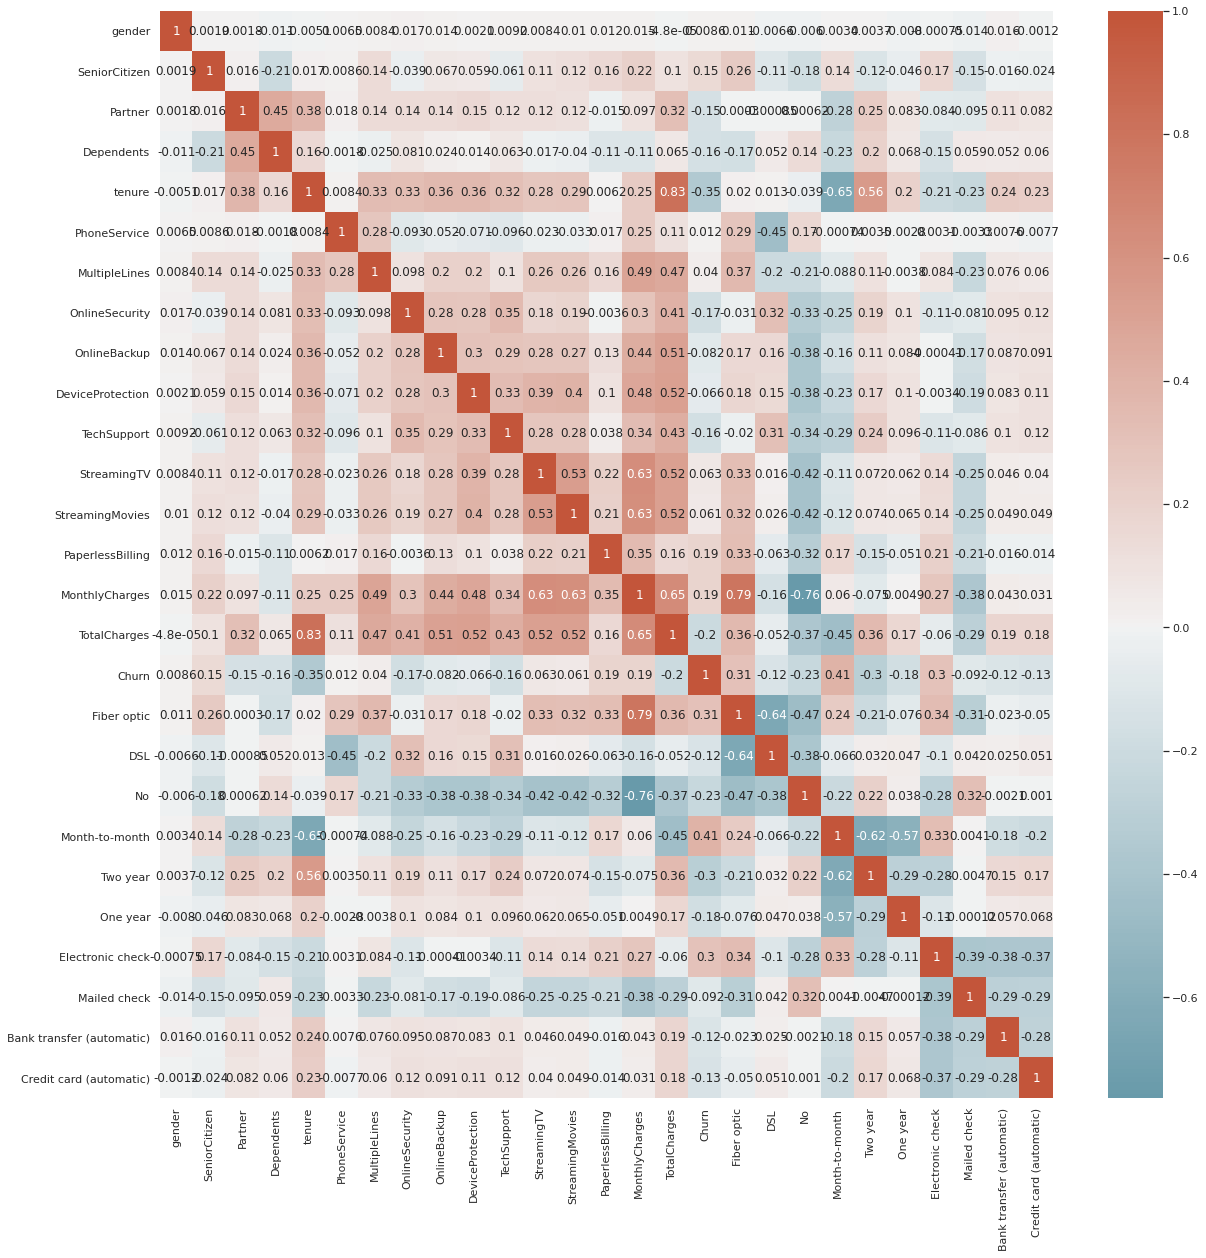

In [56]:
#Plotting a histogram helps to find the correlation among variables
import seaborn as sns
sns.set(style='white')
cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize=(20,20))
sns.heatmap(Churn_data.corr(),annot=True,cmap=cmap,center=0)

####Method - 3

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [58]:
x=x.fillna(x.mean())

In [59]:
x.isnull().sum()

gender                       0
SeniorCitizen                0
Partner                      0
Dependents                   0
tenure                       0
PhoneService                 0
MultipleLines                0
OnlineSecurity               0
OnlineBackup                 0
DeviceProtection             0
TechSupport                  0
StreamingTV                  0
StreamingMovies              0
PaperlessBilling             0
MonthlyCharges               0
TotalCharges                 0
Fiber optic                  0
DSL                          0
No                           0
Month-to-month               0
Two year                     0
One year                     0
Electronic check             0
Mailed check                 0
Bank transfer (automatic)    0
Credit card (automatic)      0
dtype: int64

In [60]:
y.isnull().sum()

0

In [61]:
from collections import OrderedDict
import pprint
#We create the Decision Tree algorithm, simply by loading it from the Sklearn library in a single line.

features=ExtraTreesClassifier(n_estimators = 100)

#Then we ask this algorithm, now dubbed as "feature_importance_indicator", to learn from our data x ( the indicators) and y( the churn outcome):
features.fit(x,y)

#We then ask the model politely to create a list of which columns it learnt the most from and which columns didn't help it at all, for this we use the "feature_importances_" command:

importance_dict= dict(zip(x.columns, (features.feature_importances_)))

#We sort the list in descending order so that it is quicker to analyse.

importance_dict_sorted= OrderedDict(sorted(importance_dict.items(), key=lambda x:x[1],reverse=1))

#The "pprint" commnad allows us to print things out nicely.

pprint.pprint(importance_dict_sorted) 

OrderedDict([('TotalCharges', 0.15071375320152364),
             ('tenure', 0.13694378984069733),
             ('MonthlyCharges', 0.1286380200594146),
             ('Month-to-month', 0.07419288624653173),
             ('Fiber optic', 0.04251604965650165),
             ('gender', 0.03735618571255315),
             ('Electronic check', 0.03341916104421605),
             ('Partner', 0.03032589763017151),
             ('PaperlessBilling', 0.02962962667228019),
             ('OnlineBackup', 0.02783116703047348),
             ('DeviceProtection', 0.026105621421026827),
             ('SeniorCitizen', 0.026005111887835403),
             ('MultipleLines', 0.025845949857072215),
             ('OnlineSecurity', 0.025561911765043143),
             ('TechSupport', 0.025308759331637152),
             ('Two year', 0.025266029305305658),
             ('Dependents', 0.024861609687630026),
             ('StreamingMovies', 0.024021419294867518),
             ('StreamingTV', 0.02220607906533956),
        

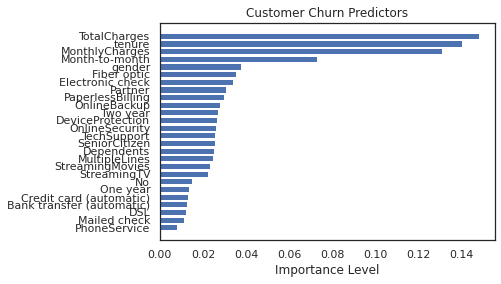

In [62]:
features.fit(x,y)
features_cols = x.columns
importances = features.feature_importances_
indices = np.argsort(importances)

plt.title('Customer Churn Predictors')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features_cols[i] for i in indices])
plt.xlabel('Importance Level')
plt.show()

In [63]:
# with the ".drop" command, we can delete the columns we have deemed unnecessary.
x.drop(columns=['gender','PhoneService','MultipleLines','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'],inplace=True)

In [ ]:
# with the ".drop" command, we can delete the columns we have deemed unnecessary.
x.drop(columns=['Mailed check','Credit card(automatic)','Bank transfer(automatic)'],inplace=True)

In [64]:
x.head(10)

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,PaperlessBilling,MonthlyCharges,TotalCharges,Fiber optic,DSL,No,Month-to-month,Two year,One year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,-1.277354,0,0,1,-1.160241,-0.994123,0,1,0,1,0,0,1,0,0,0
5575-GNVDE,0,0,0,0.066323,1,0,0,-0.259611,-0.173727,0,1,0,0,0,1,0,1,0,0
3668-QPYBK,0,0,0,-1.236636,1,0,1,-0.362635,-0.959581,0,1,0,1,0,0,0,1,0,0
7795-CFOCW,0,0,0,0.514215,1,1,0,-0.746482,-0.195234,0,1,0,0,0,1,0,0,1,0
9237-HQITU,0,0,0,-1.236636,0,0,1,0.197351,-0.940391,1,0,0,1,0,0,1,0,0,0
9305-CDSKC,0,0,0,-0.992332,0,0,1,1.159463,-0.645323,1,0,0,1,0,0,1,0,0,0
1452-KIOVK,0,0,1,-0.422287,0,0,1,0.808849,-0.147302,1,0,0,1,0,0,0,0,0,1
6713-OKOMC,0,0,0,-0.910897,1,0,0,-1.163564,-0.874107,0,1,0,1,0,0,0,1,0,0
7892-POOKP,0,1,0,-0.177982,0,1,1,1.330616,0.336492,1,0,0,1,0,0,1,0,0,0


In [65]:
import pandas as pd #Pandas is the most popular library for manipulating data. Think of it as an Excel but a million times faster and more practical.
import numpy as np # This library allows to easily carry out simple and complex mathematical operations.
import matplotlib.pyplot as plt #Allows us to plot data, create graphs and visualize data. Perfect for your Powerpoint slides ;)
import sklearn #The one and only. This amazing library holds all the secrets. Containing powerful algorithms packed in a single line of code, this is where the magic will happen.
import sklearn.model_selection # more of sklearn. It is a big library, but trust me it is worth it.
import sklearn.preprocessing 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score,mean_absolute_error,mean_squared_error,precision_score,recall_score, accuracy_score,f1_score
from sklearn.utils import shuffle
import random # Allows us to call random numbers, occasionally very useful.
from google.colab import files #Allows to upload and download files directly from the browser.
import pprint#Allows us to neatly display text
from collections import OrderedDict


###**Splitting the data into Train and Test**

In [66]:
# We use the "train_test_split" command to seperate our data into "training" and "testing". The "test_size" variable allows to decide how much of the data we will keep for testing, in this case we do a conventional 80-20 split. 
#Random state shuffles the data, which is allows good practice. The number 18 just allows to shuffle the data the same way every time the code is executed, important for reproducability.
x_training, x_testing, y_training, y_testing = train_test_split(x, y, test_size=0.2, random_state=18)

##**Implementing machine learning models**

###**Logistic regression**

In [67]:
# We load the Algorithm from the library and give the name of "logistic_regression"
logistic_regression= LogisticRegression()

In [68]:
#Firring of the model
logistic_regression.fit(x_training,y_training)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
#predicting and printing the score
y_pred = logistic_regression.predict(x_testing)
print("Model Score:",logistic_regression.score(x_testing,y_testing))

Model Score: 0.8183108587650816


###Different evaluation metrics

In [70]:
from sklearn.metrics import *
accuracy_score(y_testing,y_pred)

0.8183108587650816

In [73]:
precision_score(y_testing,y_pred)

0.6507936507936508

In [74]:
recall_score(y_testing,y_pred)

0.584045584045584

In [75]:
f1_score(y_testing,y_pred)

0.6156156156156157

In [118]:
#Comparing the actual and predicted results
df_1 = pd.DataFrame({'Actual': y_testing, 'Predicted': y_pred})  
df_1.head(10)

,Actual,Predicted
customerID,,
8498-XXGWA,0,0
2091-RFFBA,1,1
7623-TRNQN,1,0
4565-EVZMJ,0,0
6693-DJWTY,0,0
4698-KVLLG,0,0
6322-HRPFA,0,0
0723-FDLAY,0,0
8042-RNLKO,0,0


In [90]:
#Checking all the dataframe columns
x_testing.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity',
       'TechSupport', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Fiber optic', 'DSL', 'No', 'Month-to-month', 'Two year', 'One year',
       'Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'],
      dtype='object')

In [119]:
#Created a random dataframe row to test on the model
x_test_df_1 =  pd.DataFrame({'SeniorCitizen':1,'Partner':1,'Dependents':0,'tenure':-1.290354,'OnlineSecurity':0,'TechSupport':1,'PaperlessBilling':1,'MonthlyCharges':-1.154161	,'TotalCharges':-0.989123,'Fiber optic':1,'DSL':1,'No':1,'Month-to-month':1,'Two year':0,'One year':0,'Electronic check':1,'Mailed check':0,'Bank transfer (automatic)':1,
                           'Credit card (automatic)':0}, index=[0])

In [120]:
#predicting the output
churn_respsonse_1 = logistic_regression.predict(x_test_df_1)

In [121]:
churn_respsonse_1[0]

1

###**SVM**

In [76]:
#Implementing Classifier SVM
import sklearn
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.externals import joblib
from sklearn import svm, metrics, datasets

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [97]:
#Using the gridsearch method to find the optimized hyper parameters for SVM
 param_grid = [
        {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
        {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
      ]
 svc = svm.SVC()
 clf = GridSearchCV(svc, param_grid, refit = True, verbose = 3,n_jobs = -1)
 clf.fit(x_training,y_training)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

###Different evaluation metrics

In [ ]:
y_predict_svm = clf.predict(x_testing)

In [80]:
accuracy_score(y_testing,y_pred_svm)

0.8119233498935415

In [81]:
precision_score(y_testing,y_pred_svm)

0.6666666666666666

In [82]:
recall_score(y_testing,y_pred_svm)

0.49002849002849

In [83]:
f1_score(y_testing,y_pred_svm)

0.5648604269293924

In [85]:
#Compare actual and predicted results
df = pd.DataFrame({'Actual': y_testing, 'Predicted': y_pred_svm})  
df.head(10)

,Actual,Predicted
customerID,,
8498-XXGWA,0,0
2091-RFFBA,1,1
7623-TRNQN,1,0
4565-EVZMJ,0,0
6693-DJWTY,0,0
4698-KVLLG,0,0
6322-HRPFA,0,0
0723-FDLAY,0,0
8042-RNLKO,0,0


In [107]:
#Created a random dataframe row to test on the model
x_test_df_2 =  pd.DataFrame({'SeniorCitizen':0,'Partner':0,'Dependents':0,'tenure': -1.236636,'OnlineSecurity':1,'TechSupport':0,'PaperlessBilling':1,'MonthlyCharges':-0.362635	,'TotalCharges':-0.959581,'Fiber optic':0,'DSL':1,'No':0,'Month-to-month':1,'Two year':0,'One year':0,'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':0,
                           'Credit card (automatic)':0}, index=[0])

In [108]:
#predicting the output
churn_respsonse = clf.predict(x_test_df_2)

In [109]:
churn_respsonse[0]

0